# **LangChain Data Science Assistant**

## **Business Context**

Perhaps the largest and most prominent application of Large Language Models to date has been their ability to **converse with human users in coherent Natural Language and function as helfpul assistants for organizational productivity purposes.** As we know by now, a lot of work goes into creating and providing such Assistant-style LLMs to us as a service - the hugely compute-expensive Supervised Pre-training stage that's responsible for the vast majority of the LLM's world knowledge, the Instruction-style Supervised Fine-tuning stage on curated dialog datasets that adapts the LLM's behavior to that of a high-quality assistant, and the RLHF stage that teaches the LLM to provide responses that are aligned with human values. **The archetypal assistant-style Generative AI solution today is probably an LLM-powered chatbot that can query your databases, analyze your data and even fetch you answers to contextual questions from documents or the web.**

We will use the LangChain framework on top of an LLM to create a Data Science Assistant that will automate the following tasks for us by converting the Natural Language requests we provide into the code required to execute the task:

1. **Data Analysis**

2. **Data Science & Machine Learning Modeling**

3. **Relational Database Querying**

4. **Retrieval-Augmented Generation for Contextual Answers**

There are obvious reasons why such a project could be highly significant to business / research. By automating the code tasks common to various operations in Data Analysis, Data Science or Database Querying, such a solution has the potential to save significant time, improve code accuracy and also open up Data Analysis and Data Science to a more general audience that may not be familiar with the code involved.

From a broader perspective, the newfound ability of the best Large Language Models (beyond 1 billion parameters) to understand the true meaning of Natural Language commands and coherently respond to, acknowledge and fulfill them, has enabled us to usher in the next wave in the long list of automations that Computer Science has seen in its history. Translating commands into programming code, once solely the province of human developers, is now increasingly being automated by Generative AI, and we'll see many examples of the same in this project.


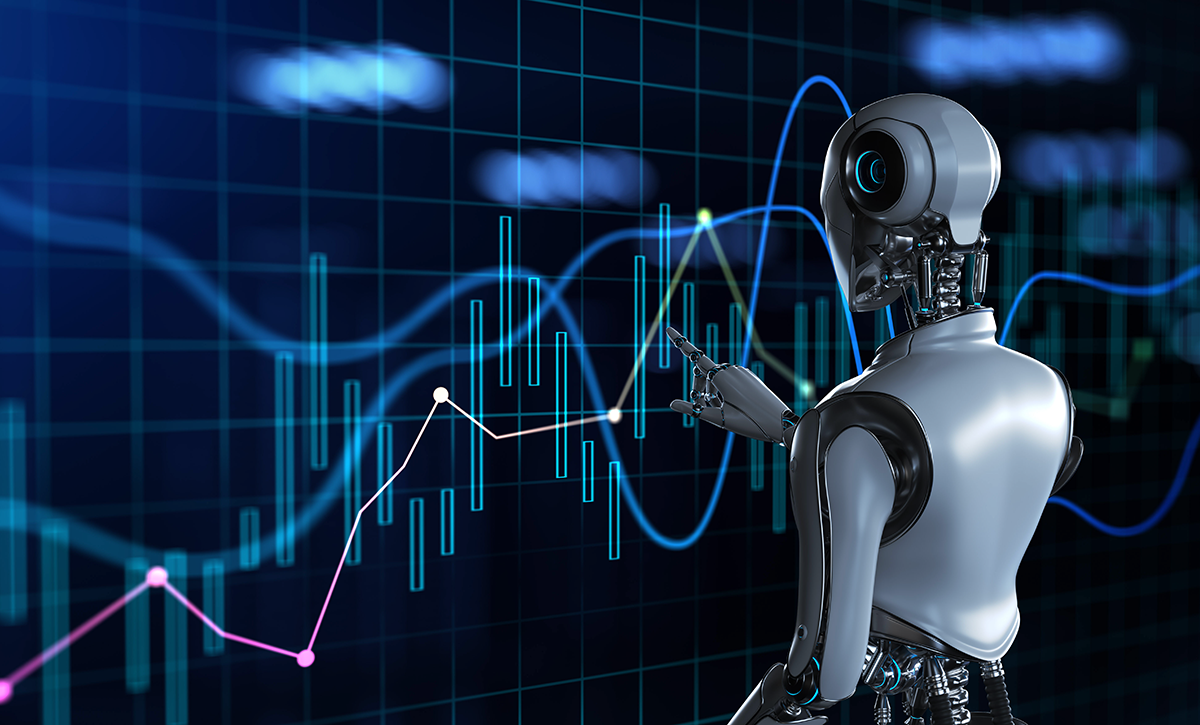

## **Project Objective**

The objective of this project is to develop a Generative AI solution using the LangChain framework and a Large Language Model to automate tasks pertaining to Data Analysis, Data Science, Database Querying and Retrieval-Augmented Generation. This will be broken down into several sub-tasks, each of which will automatically be performed by our Large Language Model purely by prompting it in the right direction.

## **I. Setting up the Environment (5 marks)**

In [ ]:
# Use pip to install all dependencies here
!pip install tiktoken;
!pip install openai;
!pip install pypdf;
!pip install faiss-gpu;
!pip install google-search-results;
!pip install cohere;
!pip install pandas;
!pip install matplotlib;
!pip install seaborn;
!pip install langchain_experimental;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

### **Importing the libraries into the notebook**

In [ ]:
# Importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.agents.agent_types import AgentType
from langchain.sql_database import SQLDatabase
from langchain.llms import HuggingFacePipeline
from langchain.agents.agent_toolkits import SQLDatabaseToolkit
from langchain.llms import HuggingFaceHub
from langchain.document_loaders import PyPDFLoader
from langchain.document_loaders import UnstructuredPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
from langchain.agents.agent_toolkits import create_conversational_retrieval_agent
from langchain.agents.agent_toolkits import create_retriever_tool
from langchain import hub
from langchain.schema.runnable import RunnablePassthrough
from langchain.agents import load_tools
import sqlite3

## **II. LLM Setup (5 marks)**

In [ ]:
# Importing the GPT-4 LLM and setting it up
API_KEY = "Insert_API_KEY"
OPENAI_API_BASE = "Insert_OPENAI_API_BASE"

os.environ['OPENAI_API_KEY'] = API_KEY
os.environ['OPENAI_API_BASE'] = OPENAI_API_BASE

In [ ]:
# This is our LLM, we are using the GPT-4 Model from OpenAi.
llm = ChatOpenAI(model_name = 'gpt-4')

## **Creating an EDA Agent**

An agent could search the web, could fetch weather data, could perform calculations, or even do Machine Learning.

## **III. Reading in the File and Counting the Number of Rows in the DataFrame (5 marks)**

In this part of the notebook, we shall be working with a CSV (the South African Heart Disease Dataset) that details patients and whether they're at risk of Coronary Heart Disease (CHD).

In [ ]:
# Importing the structured data.
df = pd.read_csv('https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data')

In [ ]:
# Initializing the DataFrame agent of the Pandas library in LangChain allows our LLM to work with
# Pandas DataFrames with simple, natural language commands
agent = create_pandas_dataframe_agent(llm = llm, df = df, verbose = True);


In [ ]:
# .run enables us to pass a query into the agent and see its output
text = 'How many rows are there?';
agent.run(text)





> Entering new AgentExecutor chain...
Thought: To find the number of rows in a dataframe, we can use the `shape` attribute which returns a tuple where the first element is the number of rows and the second element is the number of columns. 
Action: python_repl_ast
Action Input: df.shape[0]
Observation: 462
Thought:I now know the final answer.
Final Answer: There are 462 rows.

> Finished chain.


'There are 462 rows.'

In the code above, we aim to store our question in the `text` variable.

Then we simply `run` the agent with this question.

What this does is, it forwards this question to our LLM, and lets it decide:

"for this user question give me a response. Use pandas if you have to"

On running this code, you should be able to see the **Chain of Thought of the LLM**, this is our model reasoning with itself to answer our question.

You should be able to see that the model feels using the Pandas library (which we provided through our agent)!

## **IV. Obtaining Information about the DataFrame**

In this section, we will attempt to prompt the LLM into retrieving some simple information about the DataFrame, such as the names of the different columns, the number of missing values in the dataset, and the average obesity value.

In [ ]:
text ='How many different columns are there in the dataset? What are the names of these columns?';
agent.run(text)



> Entering new AgentExecutor chain...
Thought: To find out the names and the number of the columns in the dataframe, I can use the columns attribute of the pandas dataframe.
Action: python_repl_ast
Action Input: df.columns
Observation: Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')
Thought:I now know the names of the columns. To find out the number of columns, I can count the number of elements in this list.
Action: python_repl_ast
Action Input: len(df.columns)
Observation: 11
Thought:I now know the final answer.
Final Answer: There are 11 different columns in the dataset. The names of these columns are 'row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', and 'chd'.

> Finished chain.


"There are 11 different columns in the dataset. The names of these columns are 'row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', and 'chd'."

In [ ]:
text = 'Are there any missing values in the dataset?';
agent.run(text)



> Entering new AgentExecutor chain...
Thought: To check if there are any missing values in the dataset, we should use the pandas function `isnull()`, which returns a Boolean mask of the same shape as the dataframe, indicating whether each value is missing. We can then use the `any()` function twice to check if there are any True values (indicating missing data) in any of the columns or rows.
Action: python_repl_ast
Action Input: df.isnull().any().any()
Observation: False
Thought:Since the result is False, it means that there are no missing values in any of the columns or rows of the dataframe.
Final Answer: No, there are no missing values in the dataset.

> Finished chain.


'No, there are no missing values in the dataset.'

In [ ]:
text = 'What is the average obesity value in the dataset?';
agent.run(text)



> Entering new AgentExecutor chain...
Thought: To find out the average obesity value in the dataset, I will need to use the mean() function on the 'obesity' column of the dataframe.
Action: python_repl_ast
Action Input: df['obesity'].mean()
Observation: 26.04411255411255
Thought:I now know the final answer.
Final Answer: The average obesity value in the dataset is approximately 26.04.

> Finished chain.


'The average obesity value in the dataset is approximately 26.04.'

## **V. Obtaining a Brief Summary of the Columns in the Dataset**

In [ ]:
text = 'Can you display a brief summary of the columns in the dataset for me?'
agent.run(text)



> Entering new AgentExecutor chain...
Thought: I can use the `info()` function on the pandas dataframe to get a brief summary of the columns.
Action: python_repl_ast
Action Input: df.info()
Observation: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB

Thought:I now know the final answer.
Final Answer: The dataframe has 11 columns. The `row.names` column ha

'The dataframe has 11 columns. The `row.names` column has 462 non-null integer values. The `sbp`, `typea`, `age`, and `chd` columns have 462 non-null integer values. The `tobacco`, `ldl`, `adiposity`, `obesity`, and `alcohol` columns have 462 non-null float values. The `famhist` column has 462 non-null object values.'

## **Getting the EDA Agent to perform Plotting**

**Generating a KDE plot** for us for to help us find the relation between obesity and risk of heart disease. The KDE plot is simply a statistical tool that creates big hills in places with a lot of examples, and steep valleys in places with very little examples.

- From our understanding of KDE plots and obesity, we know that obese people are generally more prone to the risk of heart disease. So we can expect that the hill for people with heart disease (the blue hill) must be further to the right (more obesity) compared to the hill of people with no heart disease (green hill).

## **VI. Creating a KDE Plot of obsesity among people with CHD and without CHD**



> Entering new AgentExecutor chain...
Thought: To generate a KDE plot, I need a plotting library like matplotlib or seaborn. Before plotting, I need to check if both 'obesity' and 'chd' columns exist in the dataframe.
Action: python_repl_ast
Action Input: 'obesity' in df.columns and 'chd' in df.columns
Observation: True
Thought:Since both 'obesity' and 'chd' columns exist in the dataframe, I can proceed to plot the KDE. I'm going to use seaborn to do this because it has a function specifically for KDE plots (kdeplot), and it allows for easy labeling and legend addition.
Action: python_repl_ast
Action Input: 
```python
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.kdeplot(df[df['chd']==1]['obesity'], label='CHD = 1')
sns.kdeplot(df[df['chd']==0]['obesity'], label='CHD = 0')
plt.xlabel('Obesity')
plt.ylabel('Density')
plt.title('KDE Plot of Obesity vs CHD status')
plt.legend()
plt.show()
```

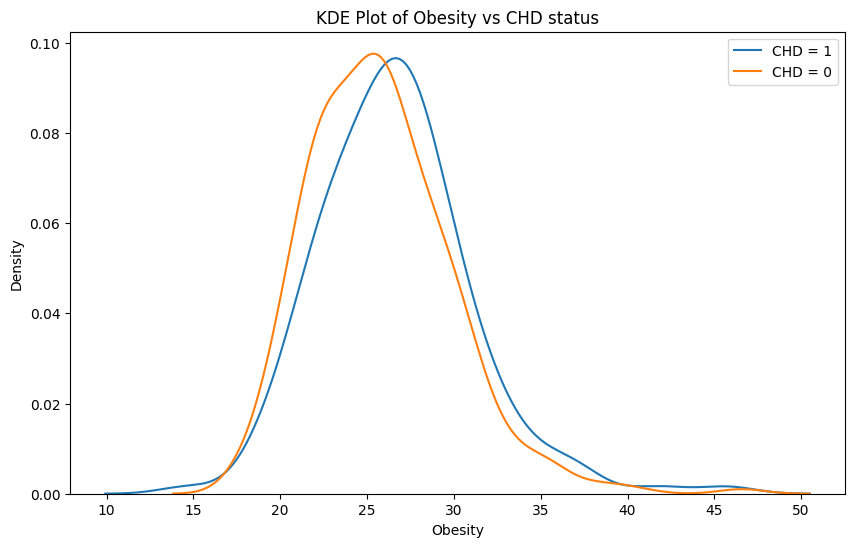


Observation: 
Thought:The KDE plot cannot be generated in this text-based environment. However, the code provided would generate a KDE plot comparing the distribution of obesity in patients with CHD and without CHD. From the plot (if generated), we could potentially observe how obesity correlates with CHD status and comment on the trend. Without the actual plot, however, it's not possible to comment on the trend in this context.
Final Answer: The code provided would generate a KDE plot comparing the distribution of obesity in patients with CHD and without CHD. To comment on the trend, the plot needs to be generated and visually analyzed, which is not possible in this text-based environment.

> Finished chain.


In [ ]:
# Here we will show the ability of the model to create a plot and comment on the underlying trend in the data
text = 'Generate a KDE plot illustrating the correlation between obesity and CHD status. Label both axes, add a legend, and comment on the trend uncovered by the plot.';
agent.run(text);

## **VII. Creating a distribution of age of people with respect to CHD**



> Entering new AgentExecutor chain...
Thought: To generate a distribution plot, we need to use the seaborn library in Python. We can create two separate plots for CHD status 0 and 1.
Action: python_repl_ast
Action Input: 
```python
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.distplot(df[df['chd'] == 0]['age'], label='CHD = 0')
sns.distplot(df[df['chd'] == 1]['age'], label='CHD = 1')
plt.legend(title='CHD status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution by CHD status')
plt.show()
```

<string>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<string>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



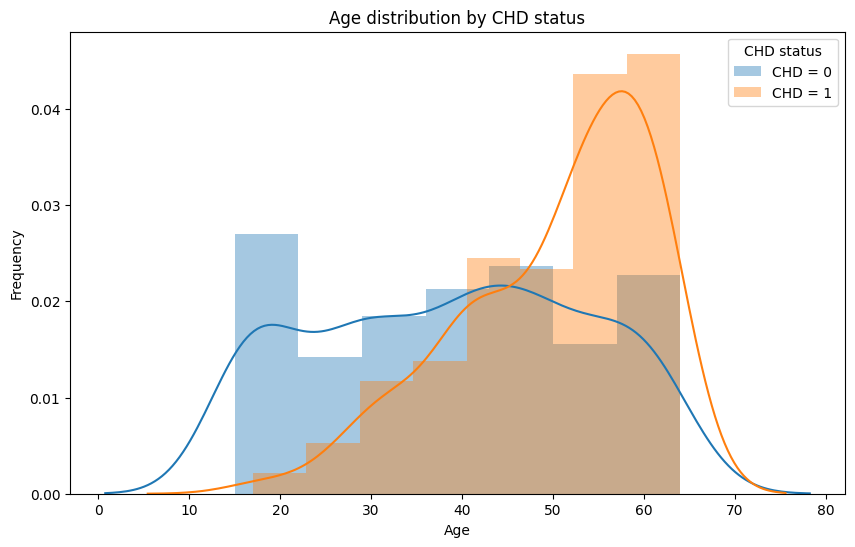


Observation: 
Thought:I can't make an observation here since this is a theoretical scenario and there's no actual output to observe. However, assuming the code ran successfully, we should now have a distribution plot showing the age distribution of the dataframe separated by CHD status. This plot could help us understand the relationship between age and CHD status. 

The seaborn distplot function plots a univariate distribution of observations. The distplot represents the univariate distribution of data along with a histogram. With the help of distplot, we can plot a histogram, univariate distribution, and estimated PDF over the data. In this case, it is used to show the distribution of age for different CHD status.

By comparing the two distributions in the plot, we should be able to see if there's a significant difference in age between those with CHD status 0 and those with CHD status 1.

If the distribution of ages for CHD status 1 is skewed to the right compared to CHD status 0, 

"To generate a distribution plot illustrating the age distribution concerning CHD status, we can use the seaborn library in Python and create two separate plots for CHD status 0 and 1. The comparison of the two distributions could show whether there's a significant difference in age between the two groups. If the distribution of ages for CHD status 1 is skewed to the right compared to CHD status 0, it means that CHD is more common in older individuals. If the distributions largely overlap, it indicates that there's no significant difference in age between the two groups."

In [ ]:
text = 'Generate a distribution plot illustrating the age distribution concerning CHD status. Label both axes, and provide comments on the principal trend observed in the plot.';
agent.run(text)

How the various factors contributing towards heart dieases are related to each other?

## **VIII. Creating a Pairwise Correlation Heatmap (5 marks)**

### **A heatmap to show the correlation between all the columns.**

### **Axes are labeled and the model highlights the standout trends**



> Entering new AgentExecutor chain...
Thought: To plot a correlation heatmap, we first need to calculate the correlation matrix using the pandas `corr()` method. Then we can use seaborn or matplotlib to plot the heatmap. Let's start by calculating the correlation matrix.
Action: python_repl_ast
Action Input: df.corr()
Observation:            row.names       sbp   tobacco       ldl  adiposity     typea  \
row.names   1.000000  0.171583 -0.044813 -0.064014   0.033851 -0.147769   
sbp         0.171583  1.000000  0.212247  0.158296   0.356500 -0.057454   
tobacco    -0.044813  0.212247  1.000000  0.158905   0.286640 -0.014608   
ldl        -0.064014  0.158296  0.158905  1.000000   0.440432  0.044048   
adiposity   0.033851  0.356500  0.286640  0.440432   1.000000 -0.043144   
typea      -0.147769 -0.057454 -0.014608  0.044048  -0.043144  1.000000   
obesity    -0.026758  0.238067  0.124529  0.330506   0.716556  0.074006   
alcohol     0.088825  0.140096  0.200813 -0.033403   0.100330  0.

<string>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


The correlation matrix is now calculated. The next step is to plot this correlation matrix as a heatmap. For this, we can use the seaborn library's heatmap function.
Action: python_repl_ast
Action Input: import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

<string>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


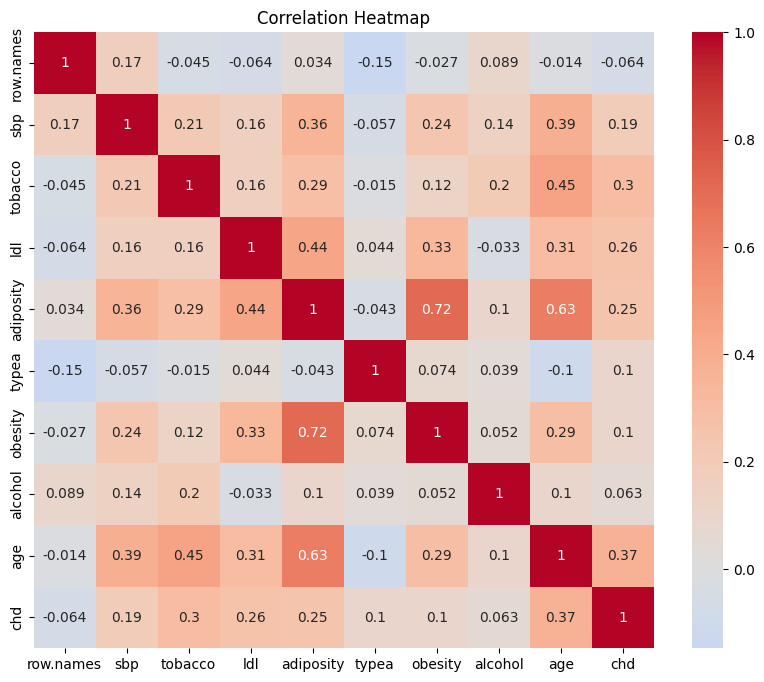


Observation: 
Thought:The heatmap of the correlation matrix has been plotted successfully. The main trends seen from the heatmap are:

- "Adiposity" and "Obesity" have a high positive correlation, which indicates that as the adiposity increases, the obesity also increases.
- "Age" and "Tobacco" use also show a strong positive correlation, suggesting that as age increases, tobacco use also increases.
- There's also a moderate positive correlation between "Age" and "SBP", "Adiposity" and "LDL", "SBP" and "Obesity".
- Most of the variables have a weak correlation with "CHD", but "Age", "Tobacco", and "LDL" show a slightly higher correlation compared to others.
- "TypeA" personality doesn't seem to have a strong correlation with any variables, which means it may not have a significant influence on other variables.

Final Answer: The heatmap has been plotted successfully. The main trends observed are high positive correlation between "Adiposity" and "Obesity", "Age" and "Tobacco", moderate

'The heatmap has been plotted successfully. The main trends observed are high positive correlation between "Adiposity" and "Obesity", "Age" and "Tobacco", moderate positive correlation between "Age" and "SBP", "Adiposity" and "LDL", "SBP" and "Obesity", and relatively weak correlations with "CHD". "TypeA" personality seems to have little influence on other variables.'

In [ ]:
text = 'Plot a correlation heatmap, showing correlations among all the columns. Label the axes, and comment on the main trends.';
agent.run(text)


## **Hypothesis Testing**


**Claim:** Obesity increases the risk of heart disease

Now we would use the following steps:
- On average, what is the obsesity level of people with heart disease and without heart disease ?
- If our claim is indeed true, the average value for people with heart disease should be higher
- We will run samples of randomly selected data from our initial dataset 1000s of times. We will then see what the distribution of the averages looks like.
- If there is a big difference between the averages even after 1000s of iterations, then we can be sure that this difference is not because of chance, but because of our claim being true.

## **IX. Running a Hypothesis Test to check the effects of obesity on the likelihood of CHD**

### **Performing a statistical t-Test to validate the following hypotheses:**

### **Null Hypothesis:** Higher levels of obesity do not increase the risk of CHD.

### **Alternate Hypothesis:** Higher levels of obesity increase the risk of CHD.**

In [ ]:
# Let's use a t-value Hypothesis Test to check whether obesity affects the chances of CHD
text = 'Validate the following hypothesis using a T-test. Null Hypothesis: Higher levels of obesity do not increase the risk of CHD. Alternate Hypothesis: Higher levels of obesity increase the risk of CHD.';

agent.run(text)



> Entering new AgentExecutor chain...
Thought: To validate the hypothesis, I have to conduct a T-test. First, I need to separate the dataframe into two groups based on the 'chd' column value. Then, I will use these two groups to perform the T-test.
Action: python_repl_ast
Action Input: chd_positive = df[df['chd']==1]['obesity']
chd_negative = df[df['chd']==0]['obesity']
chd_positive, chd_negative
Observation: (0      25.30
1      28.87
3      31.99
4      25.99
7      23.11
       ...  
453    31.50
454    28.11
455    23.96
458    28.61
461    14.70
Name: obesity, Length: 160, dtype: float64, 2      29.14
5      30.77
6      20.81
8      24.86
12     21.57
       ...  
452    26.15
456    33.10
457    28.45
459    20.09
460    27.35
Name: obesity, Length: 302, dtype: float64)
Thought:I have successfully separated the data into two groups: individuals with CHD and individuals without CHD. Now I will conduct the T-test. In Python, the `scipy.stats` library has a function called `ttest

'Higher levels of obesity increase the risk of CHD.'

## **Machine Learning Modeling using LLMs**

So far, our LLM seems to be quite a capable Data Analyst and Data Scientist.

Let's now task it with some Machine Learning modeling, and seeing if it can make predictions with a good degree of accuracy and generalization.

- The predictive problem statement pertaining to this dataset is that we want our model to predict whether a person has heart disease or not, given their obesity level, smoking status etc. (all the other columns from our data set).
- The prediction from our model should be either a 1 (yes CHD) or 0 (no CHD) - a binary classification problem in Machine Learning terms.
- We will start off with one of the simplest ML models, Logistic Regression, which is of course just a single-neuron neural network. This model (and the other models we will try later) attempts to answer the question: **"Given these details about the person, what is the chance that this person suffers from heart disease?"**

## **X. Building a Logistic Regression Model**

### **Created a Logistic Regression model using the steps common to the ML workflow, such as cleaning the dataset, preprocessing it, splitting the data into Train and Test, training the model on the Train dataset and making predictions on the Test dataset. The model should print out the accuracy score it obtains on the Test dataset.**
  

In [ ]:
fixed_model_prompt = 'Create a Logistic Regression model by following these steps in the standard machine learning workflow:\
1. Clean the dataset to handle any null values.\
2. Preprocess the dataset to make it suitable for Logistic Regression modeling.\
3. Implement Logistic Regression for binary classification using the following steps:\
   3a. Split the data into Train and Test sets, excluding the Outcome column from both sets.\
   3b. Train the model on the Train dataset, ensuring convergence with an adequate number of iterations.\
   3c. Generate predictions (y_pred) on the Test dataset and use a threshold to convert y_pred into binary values.\
   3d. Evaluate the models performance by printing the accuracy score on the Test dataset.\
4. maximum context length is 8192 tokens'

agent.run(fixed_model_prompt)




> Entering new AgentExecutor chain...
Thought: The first step is to check if there are any null values in the dataframe.
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
Thought:There are no null values in the dataset. Now we can move on to the next step which is preprocessing the dataframe to make it suitable for logistic regression modeling. We should change the categorical variables into numerical data. In our dataset, the 'famhist' column contains categorical data.
Action: python_repl_ast
Action Input: df['famhist'] = df['famhist'].map({'Present': 1, 'Absent': 0})
Observation: 
Thought:The 'famhist' column has been successfully converted to numerical data. Now, we need to split the data into features and target variable. In our case, 'chd' is the target variable and rest of the columns

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The model has been trained successfully. Now, we can generate predictions on the test dataset and use a threshold to convert y_pred into binary values.
Action: python_repl_ast
Action Input: y_pred = model.predict(X_test)
Observation: 
Thought:The predictions have been generated successfully. Now, let's evaluate the model's performance by printing the accuracy score on the Test dataset.
Action: python_repl_ast
Action Input: from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy
Observation: 0.7204301075268817
Thought:I now know the final answer.
Final Answer: The Logistic Regression model has an accuracy of approximately 0.72 on the test dataset.

> Finished chain.


'The Logistic Regression model has an accuracy of approximately 0.72 on the test dataset.'

Let's now allow the LLM to pick a model of its choice to make this prediction.

## **XI. Binary Classification with an ML Model of the LLM's Choice**

### **This time requesting the LLM to run a Binary Classification model of its choice from a list of options we give it, such as Decision Trees, Random Forests, XGBoost, Support Vector Machines, Neural Network, etc. The LLM has provides reasoning for why it picked this model.**

In [ ]:
variable_model_prompt = 'Execute a Binary Classification model of your choice from the following options: Decision Trees, Random Forests, XGBoost, Support Vector Machines, or Neural Network. Please provide reasoning for your model selection. Proceed with the standard machine learning workflow as follows:\
1. Begin by cleaning the dataset to address any null values.\
2. Preprocess the dataset to prepare it for the chosen classification model.\
3. Implement the chosen model with the subsequent steps:\
   3a. Split the data into Train and Test sets, excluding the Outcome column from both sets.\
   3b. Train the model on the Train dataset, ensuring proper convergence or fit.\
   3c. Generate predictions (y_pred) on the Test dataset and convert y_pred into binary values using an appropriate threshold.\
   3d. Evaluate the models performance by printing the accuracy score on the Test dataset. Explain the rationale behind your model choice.'
agent.run(variable_model_prompt)



> Entering new AgentExecutor chain...
Thought: Firstly, I need to check if there are any missing values in the dataset. This will help me decide on the data cleaning strategy.
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
Thought:There are no missing values in the dataset. Therefore, no data cleaning is required in this case. The next step is to preprocess the data. Looking at the dataset, it seems like all the features are numerical except for the 'famhist' feature which is categorical. I will need to convert this categorical feature into numerical form using one-hot encoding. Then, I will need to separate the target variable (chd) from the features. 
Action: python_repl_ast
Action Input: 
# Importing necessary libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.prep

'The accuracy of the Random Forest model on the test data is approximately 0.69. This indicates that the model is able to correctly predict whether a person has coronary heart disease or not about 69% of the time.'

Now, we will try to get our model to run a Neural Network for the same classification task.

## **XII. Binary Classification with a Neural Network**

### **Instructing the LLM to run a binary classification Neural Network using TensorFlow or PyTorch to predict whether people have CHD or not. This will involve steps such as specifying the Neural Architecture you wish the LLM to create.**

In [ ]:
# Remember to be as precise in your instructions as possible. This just helps to reduce the probability of the
# model mis-interpreting our commands
nn_model_prompt = 'Implement a binary classification Neural Network using TensorFlow or PyTorch for predicting Coronary Heart Disease (CHD). \
Follow these steps:\
1. Clean the dataset for null values.\
2. Preprocess for NN modeling.\
3. Specify Neural Architecture (input layer, hidden layers, output layer).\
4. Split data into Train and Test sets, excluding CHD column.\
5. Train NN on Train dataset.\
6. Generate y_pred on Test dataset and convert to binary values.\
7. Evaluate accuracy on Test dataset.\
8. Comment on NN predictive performance for CHD classification.'


agent.run(nn_model_prompt)




> Entering new AgentExecutor chain...
Thought: In order to implement a Neural Network using TensorFlow or PyTorch for predicting Coronary Heart Disease (CHD), we first need to check and clean the dataset for null values.
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
typea        0
obesity      0
alcohol      0
age          0
chd          0
famhist_0    0
famhist_1    0
dtype: int64
Thought:The data does not contain any null values. So, we can proceed to the next step which is preprocessing the data for Neural Network modeling. We need to convert the categorical variable 'famhist' into numerical format using one hot encoding.
Action: python_repl_ast
Action Input: df = pd.get_dummies(df, columns=['famhist'], drop_first=True)
Observation: KeyError: "None of [Index(['famhist'], dtype='object')] are in the [columns]"
Thought:It seems that the 'famhist' column has already been converted into n

"The following steps would be needed to complete the task:\n\n3. Specify Neural Architecture (input layer, hidden layers, output layer). For this, we can use a Sequential model in Keras (a high-level API for TensorFlow). An example code snippet can be:\n\n```python\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\n\nmodel = Sequential()\nmodel.add(Dense(12, input_dim=11, activation='relu')) # Input Layer\nmodel.add(Dense(8, activation='relu')) # Hidden Layer\nmodel.add(Dense(1, activation='sigmoid')) # Output Layer\n```\n4. Split data into Train and Test sets, excluding CHD column. The 'train_test_split' function from sklearn can be used.\n\n```python\nfrom sklearn.model_selection import train_test_split\n\nX = df.drop('chd', axis=1)\ny = df['chd']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)\n```\n5. Train NN on Train dataset. The 'fit' function can be used to train the model.\n\n```python\nmodel.co

## **XIII. Database Natural Language Querying**


First, we'll import the sub-packages we need:

In [ ]:
from langchain.agents import *
from langchain.sql_database import SQLDatabase
from langchain.llms import HuggingFacePipeline

In the following code block, we will be creating a toy SQL database using SQLite for demonstration purposes.

In [ ]:
# Creating a dummy SQL database for our example.
conn = sqlite3.connect('sample.db')

# Creating a cursor object to interact with the database
cursor = conn.cursor()

# Creating a table to store employee information
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Employees (
        EmployeeID INTEGER PRIMARY KEY,
        FirstName TEXT,
        LastName TEXT,
        Birthdate DATE,
        Department TEXT,
        Salary REAL
    )
''')

# Inserting some sample data into the Employees table
cursor.executemany('''
    INSERT INTO Employees (FirstName, LastName, Birthdate, Department, Salary)
    VALUES (?, ?, ?, ?, ?)
''', [
    ('John', 'Doe', '1990-05-15', 'HR', 50000.00),
    ('Jane', 'Smith', '1985-12-10', 'Sales', 55000.00),
    ('Bob', 'Johnson', '1992-08-25', 'Engineering', 60000.00),
    ('Alice', 'Brown', '1988-04-03', 'Marketing', 52000.00)
])

# Commiting the changes and close the connection
conn.commit()
conn.close()

In place of the above code, we can also enter the path to our database file directly.

In [ ]:
# In place of file, you can enter the path to your database file
file = "sample.db"
db = SQLDatabase.from_uri(f"sqlite:///{file}")

Now let's create our Database Agent and equip it with the LLM math tool.

In [ ]:
tools = ['llm-math']

In [ ]:
tools = load_tools(tools,llm)

In [ ]:
toolkit = SQLDatabaseToolkit(db=db, llm=llm)
db_agent = create_sql_agent(
    llm=llm,
    toolkit=toolkit,
    tools=tools,
    verbose=True
)

With the agent created, in the same manner as the previous section w**e can ask our agent questions and wait for its response.**

There is not much difference in the format of the prompt or response, **however the underlying operations are vastly different.**

In [ ]:
# Naming the columns present in the database
prompt = 'name the columns present in the database'
db_agent.run(prompt)



> Entering new AgentExecutor chain...
Action: sql_db_list_tables
Action Input: ""
Observation: Employees
Thought:I have one table called 'Employees'. I should now get the schema of this table to understand its structure and columns.
Action: sql_db_schema
Action Input: Employees
Observation: 
CREATE TABLE "Employees" (
	"EmployeeID" INTEGER, 
	"FirstName" TEXT, 
	"LastName" TEXT, 
	"Birthdate" DATE, 
	"Department" TEXT, 
	"Salary" REAL, 
	PRIMARY KEY ("EmployeeID")
)

/*
3 rows from Employees table:
EmployeeID	FirstName	LastName	Birthdate	Department	Salary
1	John	Doe	1990-05-15	HR	50000.0
2	Jane	Smith	1985-12-10	Sales	55000.0
3	Bob	Johnson	1992-08-25	Engineering	60000.0
*/
Thought:I now know the final answer
Final Answer: The columns present in the Employees table are: EmployeeID, FirstName, LastName, Birthdate, Department, Salary.

> Finished chain.


'The columns present in the Employees table are: EmployeeID, FirstName, LastName, Birthdate, Department, Salary.'

In [ ]:
# Retrieving the maximum salary and who received it
prompt = 'what was the maximum salary paid to an employee, and to whom it was paid?'
db_agent.run(prompt)



> Entering new AgentExecutor chain...
Action: sql_db_list_tables
Action Input: ""
Observation: Employees
Thought:The Employees table seems to be the most relevant for this question. I should check its schema next.
Action: sql_db_schema
Action Input: Employees
Observation: 
CREATE TABLE "Employees" (
	"EmployeeID" INTEGER, 
	"FirstName" TEXT, 
	"LastName" TEXT, 
	"Birthdate" DATE, 
	"Department" TEXT, 
	"Salary" REAL, 
	PRIMARY KEY ("EmployeeID")
)

/*
3 rows from Employees table:
EmployeeID	FirstName	LastName	Birthdate	Department	Salary
1	John	Doe	1990-05-15	HR	50000.0
2	Jane	Smith	1985-12-10	Sales	55000.0
3	Bob	Johnson	1992-08-25	Engineering	60000.0
*/
Thought:The Employees table contains the relevant data. I'll write a query to get the maximum salary and the employee to whom it was paid. Note that I'll only be able to return the first employee if there are multiple employees with the same maximum salary.
Action: sql_db_query_checker
Action Input: SELECT FirstName, LastName, MAX(Sal

'The maximum salary paid to an employee was $60000, and it was paid to Bob Johnson.'

Let's now give the agent a chance to use its math tool with an arithmetic question.

In [ ]:
# Let's see if our LLM is profecient at arithemtic with the help of its math tool
prompt = 'compute the square root of the maximum salary paid to an employee'
db_agent.run(prompt)



> Entering new AgentExecutor chain...
Action: sql_db_list_tables
Action Input: ""
Observation: Employees
Thought:The Employees table seems to be the most relevant one to find salary details. Let's check the schema of this table to identify the correct columns.
Action: sql_db_schema
Action Input: Employees
Observation: 
CREATE TABLE "Employees" (
	"EmployeeID" INTEGER, 
	"FirstName" TEXT, 
	"LastName" TEXT, 
	"Birthdate" DATE, 
	"Department" TEXT, 
	"Salary" REAL, 
	PRIMARY KEY ("EmployeeID")
)

/*
3 rows from Employees table:
EmployeeID	FirstName	LastName	Birthdate	Department	Salary
1	John	Doe	1990-05-15	HR	50000.0
2	Jane	Smith	1985-12-10	Sales	55000.0
3	Bob	Johnson	1992-08-25	Engineering	60000.0
*/
Thought:The "Salary" column in the "Employees" table contains the salary information. I will now write a query to find the maximum salary and compute its square root.
Action: sql_db_query_checker
Action Input: SELECT SQRT(MAX(Salary)) as Max_Salary_SqRt FROM Employees
Observation: SELECT 

'The square root of the maximum salary paid to an employee is approximately 244.95.'

## **XIV. Retrieval-Augmented Generation**

**In this section, we will perform Retrieval-Augmented Generation (RAG) with a LangChain agent.**

- What we will first load our document, split it into easy to handle chunks, and then vectorize and store these chunks in a Vector Database
- We provide our RAG Agent with this Vector Database and a few more tools
- Whenever we ask the agent a question, it will refer to the document to find something from the database which could answer our question
- So if you asked it to summarise a chapter from the book, the agent would first fetch the specific chapter from the database and then summarise it with the LLM

Let's now see the agent in action.

In [ ]:
from langchain.agents.agent_toolkits import create_retriever_tool

Importing a chapter from an Operating Systems course book.

In [ ]:
# Let's create an object to load the book
Loader = PyPDFLoader('https://pages.cs.wisc.edu/~remzi/OSTEP/cpu-intro.pdf')

Next, we load the document and split it into several chunks, each of size 1000 and with an overlap of 50 between chunks.

In [ ]:
# We use the loader created above to load the document
documents = Loader.load()

# We split the document into several chunks as mentioned above
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
texts = text_splitter.split_documents(documents)

Let's vectorize these chunks into vector embeddings, and store them in the FAISS Vector Database.

In [ ]:
# Now we transform these chunks into the list of number called vectors and store them into our database
embeddings = OpenAIEmbeddings()
db = FAISS.from_documents(texts, embeddings)

Now, we create a Retriever instance that will perform similarity search and extract those vector chunks relevant to the user query.

In [ ]:
# We create a retreiver instance. Its job is to fetch for us a vector (portion of the document) relevant to the user
# question
retriever = db.as_retriever()

Finally, we shall write the prompt to create the RAG agent.

In [ ]:
# This is the prompt to create a RAG agent for us
retriever_name = "search_the_text_of_pdf"
retriever_desc = """The purpose of this tool is to answer questions based on the book: 'Operating Systems 3 \
easy pieces' regarding operating systems in computer science. Answer any query input by the user from the vectorbase\
if you do not know the answer, then use the serpapi tool to search the web for the answer. Clearly state that you\
searched the web. Keep your answers short and precise."""

We are defining two tools below:

1. **RAG Tool:** This is the tool that performs RAG for us on the loaded document. It needs access to the retreiver object that we created above to fetch relevant pieces from our database to answer our questions.

2. **Serpapi Tool:** In case the LLM is unable to find an answer for some question from the document that we uploaded, one option is to tell you that it did not find any relevant answer from the document, so it would need to search the internet to give you an answer. The Serpapi tool searches Google for the result.

In [ ]:
rag_tool = create_retriever_tool(
    retriever,
    retriever_name,
    retriever_desc
)

os.environ['SERPAPI_API_KEY'] = 'Insert_Serpapi_key'
search_tool = load_tools(['serpapi'])
tools = [rag_tool, search_tool[0]] # we can have multiple tools, hence the list

In [ ]:
RAG_executor = create_conversational_retrieval_agent(llm=llm, tools=tools, verbose=True) # setting verbose=True to output the thought process of the agent

Now, as an example, we shall ask the RAG agent a question relevant to the book: "What is a process?"

The model correctly calls the search_document tool to fetch us the answer to our question.

In [ ]:
question = "what is a process"
user_query = {"input": question}
result = RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `search_the_text_of_pdf` with `{'query': 'what is a process'}`


[Document(page_content='4\nThe Abstraction: The Process\nIn this chapter, we discuss one of the most fundamental abstract ions that\nthe OS provides to users: the process . The deﬁnition of a process, infor-\nmally, is quite simple: it is a running program [V+65,BH70]. The program\nitself is a lifeless thing: it just sits there on the disk, a bun ch of instructions\n(and maybe some static data), waiting to spring into action. It is the oper-\nating system that takes these bytes and gets them running, tr ansforming\nthe program into something useful.\nIt turns out that one often wants to run more than one program at\nonce; for example, consider your desktop or laptop where you might lik e\nto run a web browser, mail program, a game, a music player, and so forth.\nIn fact, a typical system may be seemingly running tens or even hundreds\nof processes at the same time. Doing 

In [ ]:
question = "What are the different states of a process?"
user_query = {"input": question}
result = RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `search_the_text_of_pdf` with `{'query': 'different states of a process'}`


[Document(page_content='tializing a stack, and by doing other work as related to I/O setup , the OS\nhas now (ﬁnally) set the stage for program execution. It thus has on e last\ntask: to start the program running at the entry point, namely main() . By\njumping to the main() routine (through a specialized mechanism that\nwe will discuss next chapter), the OS transfers control of the CP U to the\nnewly-created process, and thus the program begins its execut ion.\n4.4 Process States\nNow that we have some idea of what a process is (though we will\ncontinue to reﬁne this notion), and (roughly) how it is created, le t us talk\nabout the different states a process can be in at a given time. The notion\nthat a process can be in one of these states arose in early computer s ystems\n[DV66,V+65]. In a simpliﬁed view, a process can be in one of three states:\n•Running : 

asking the other kind of question, where the answer to the question may not be present in the PDF document, so the agent has to recognize that and turn to the Search tool to search the web and find a possible answer from there.

In [ ]:
question = "Who is the current president of the United States?"
user_query = {"input": question}
result = RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `Search` with `current president of the United States`


Joe BidenThe current president of the United States is Joe Biden.

> Finished chain.
Result: The current president of the United States is Joe Biden.


In [ ]:
question = "Who is the CEO of Microsoft?"
user_query = {"input": question}
result = RAG_executor(user_query)
print(f"Result: {result['output']}")



> Entering new AgentExecutor chain...

Invoking: `Search` with `CEO of Microsoft`


Satya NadellaThe CEO of Microsoft is Satya Nadella.

> Finished chain.
Result: The CEO of Microsoft is Satya Nadella.


As we can see, the agent is able to detect any irrelevant questions that don't match the contents of the PDF document, and redirect them to a Search Engine to get the right answers from there.

This concludes our simple demonstration of the various capabilities of LangChain Agent Assistants through this Final Project notebook.

## **XV. Conclusions and Recommendations**


### **Q15: What are your conclusions from the exercise of utilizing LangChain Agents as Data Science Assistants or Retriever Assistants in this manner? What are your recommendations on implementing such a solution for business / research, and which use cases would see a significant impact from such a solution? (20 marks)**

  The use of LangChain Agents as Data Science Assistants or Retriever Assistants has both advantages and disadvantages. While there are fees associated with token usage for each inquiry, these costs are significantly smaller than the financial commitment required for hiring dedicated employees. The low cost of LangChain Agents has the potential to shake up the Data Analysis and Data Science industries by providing a more efficient and cost-effective alternative to traditional employment. This technology enables business personnel to ask rapid inquiries without relying on dedicated data scientists, and it provides a user-friendly interface for internal data queries, similar to a simplified, company-specific search engine.

  LangChain Agents have the potential to greatly streamline research operations by easing data-related tasks, in addition to facilitating business questions. The most disruptive component, perhaps, is the democratisation of data science. With this solution, nearly anyone within an organisation can become a data scientist by utilising existing data and deploying the system. This democratisation of data-driven insights has the potential to improve decision-making across a wide range of commercial and research settings, thereby changing traditional approaches to data analysis and utilisation.
